## The standard deviation squares the deviation from the mean:

This results in counterintuitive results. For example, in a vector of $999,999$ zeros and a single entry of $1,000,000$:

$$\underset{\text{1 million entries}}{\underbrace{(0,0,0,\dots,10^6,0,0,\dots)}}$$

the mean is $\bar x=1$ and in every entry except for the $1,000,000$ the deviation from the mean is $1.$ Yet, the standard deviation is $1,000$ because of that single $1,000,000$ entry.

The mean average deviation is much closer to the intuition, and it is $2.$

In [ ]:
v <- c(rep(0,999999),10^6) # The vector with one single 1 million entry.

The distribution of the values of v is an example of fat tails:

In [ ]:
# The standard deviation is 1000:
sd(v)

[1] 1000

In [ ]:
# The mean average deviation is 2:
sum(abs(v-mean(v)))/length(v)

[1] 1.999998

The ratio between SD and MAD in a Gaussian distribution is $\sqrt{\frac \pi 2}=1.25:$

In [ ]:
# Ratio between SD and MAD of the Gaussian:
vec <- rnorm(10^6)
sd(vec)/(sum(abs(vec-mean(vec)))/length(vec))

[1] 1.25343

## The law of large numbers:

According to the law, the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed.

The LLN is important because it guarantees stable long-term results for the averages of some random events.

It does not speak about the Gaussian - that is for the central limit theorem.

# Correlation:

From [here](https://stats.stackexchange.com/a/3733/67822):
  
Pearson's correlation is a measure of the linear relationship between two continuous random variables. It does not assume normality although it does assume finite variances and finite covariance. When the variables are bivariate normal, Pearson's correlation provides a complete description of the association.


Spearman's correlation applies to ranks and so provides a measure of a monotonic relationship between two continuous random variables. It is also useful with ordinal data and is robust to outliers (unlike Pearson's correlation).

The distribution of either correlation coefficient will depend on the underlying distribution, although both are asymptotically normal because of the central limit theorem. This is shown in [Taleb's presentation](https://youtu.be/fb921ZrM6h0), and illustrated below.

From [here](https://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf):

Correlation is an effect size and so we can verbally describe the strength of the
correlation using the guide that Evans (1996) suggests for the absolute value of r:
 .00-.19 “very weak”

1. .20-.39 “weak”
2. .40-.59 “moderate”
3. .60-.79 “strong”
4. .80-1.0 “very strong”

[1] "There are 13.8 percent false correlations of moderate or higher degree (> 0.4), or type I errors if the sample size is 10 ."

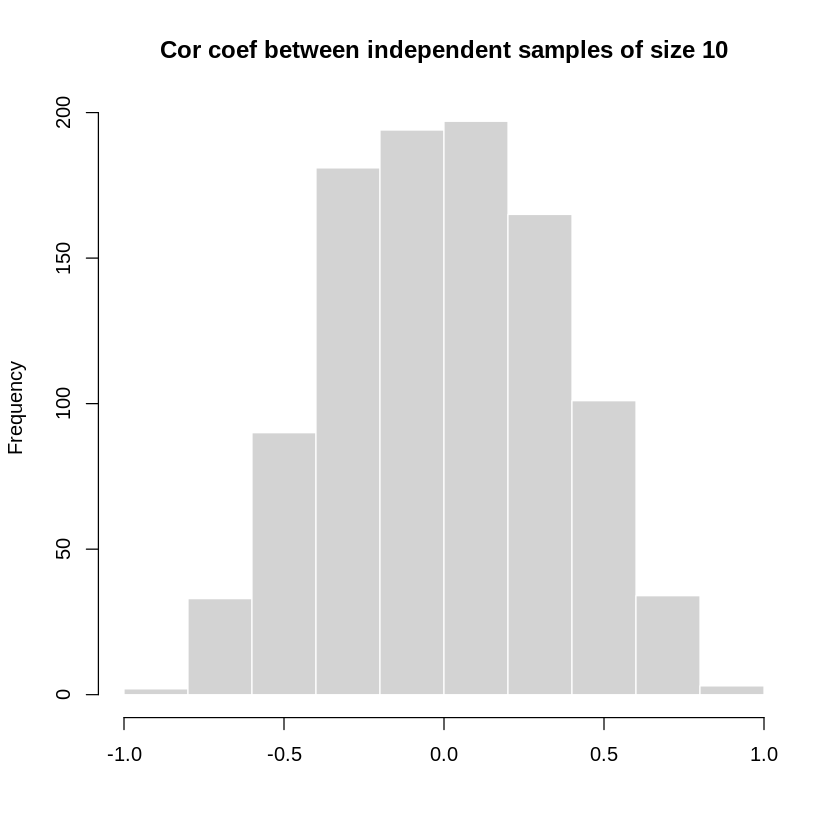

In [ ]:
set.seed(2021)
n <- 1000 # Number of experiments to find correlation between completely independent Gaussian samples.
s <- 10   # Number of observations in each sample.
v <- vector(,n)
for(i in 1:n){
  X = rnorm(s); Y= rnorm(s); v[i] <- cor(X,Y)
}
hist(v, main=paste('Cor coef between independent samples of size', s), xlab='', border=F)
paste('There are', sum(v > .4)/length(v) * 100, 'percent', 'false correlations of moderate or higher degree (> 0.4), or type I errors if the sample size is',s,'.')

The cutoff for significance is r = 0.55:

In [ ]:
# If we want a risk alpha of 5 percent, the cutoff should be at 0.55:
paste('There are', sum(v > .55)/length(v) * 100, 'percent', 'false correlations of moderate or higher degree, or type I errors.')

[1] "There are 5 percent false correlations of moderate or higher degree, or type I errors."

The correlation is tested for its p-value with a t-test, as explained [here](http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r).

In [ ]:
X = rnorm(s)
Y = rnorm(s)
cor(X,Y)
cor.test(X, Y, method=c('pearson'))
cor.test(X, Y, method=c('pearson'))$p.value

[1] -0.1299026


	Pearson's product-moment correlation

data:  X and Y
t = -0.37056, df = 8, p-value = 0.7206
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7021038  0.5442369
sample estimates:
       cor 
-0.1299026 


[1] 0.7205848

In [ ]:
set.seed(2021)
v <- vector(,n)
w <- vector(,n)
for(i in 1:n){
  X = rnorm(s); Y= rnorm(s);
  v[i] <- cor.test(X, Y, method=c('pearson'))$p.value
  w[i] <- cor(X,Y)
}
mean(v<0.05) # Fractionvof p-values that are type I errors.
mean(w>0.55) # The cutoff for significance of the p.value in a sample of 10 is approximately an r = 0.55.

[1] 0.051

[1] 0.05

[1] "There are 0 percent false correlations of moderate or higher degree, or type I errors."

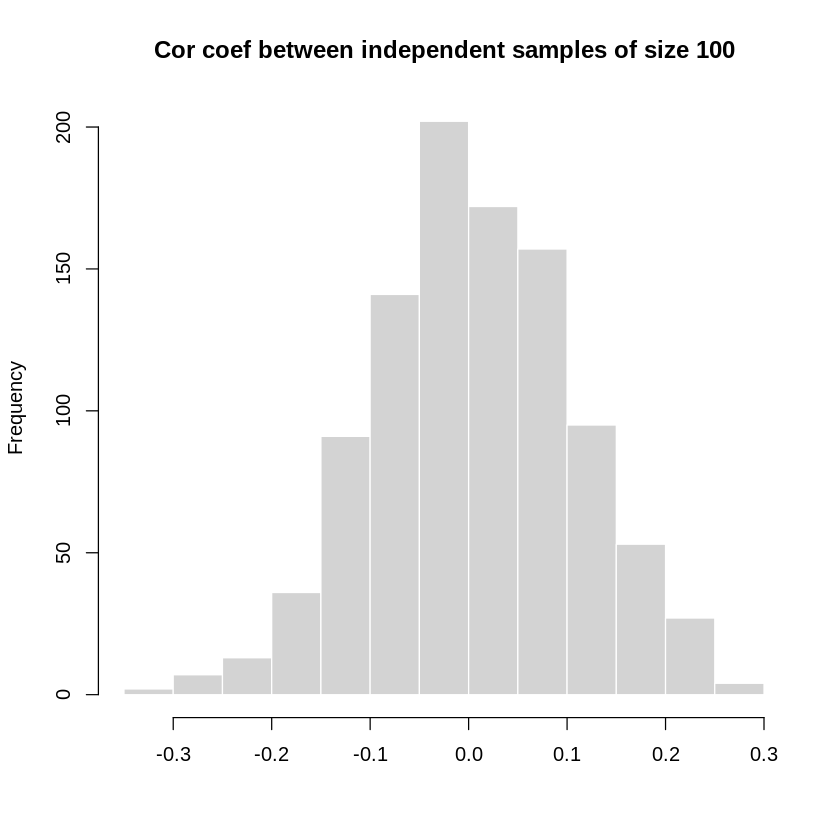

In [ ]:
# Increasing the sample size tenfold the results are more reliable:

n <- 1000 # Number of experiments to find correlation between completely independent Gaussian samples.
s <- 100   # Number of observations in each sample.
v <- vector(,n)
for(i in 1:n){
  X = rnorm(s); Y= rnorm(s); v[i] <- cor(X,Y)
}
hist(v, main=paste('Cor coef between independent samples of size', s), xlab='', border=F)
paste('There are', sum(v > .4)/length(v) * 100, 'percent', 'false correlations of moderate or higher degree, or type I errors.')

In [ ]:
set.seed(2021)
v <- vector(,n)
w <- vector(,n)
for(i in 1:n){
  X = rnorm(s); Y= rnorm(s);
  v[i] <- cor.test(X, Y, method=c('pearson'))$p.value
  w[i] <- cor(X,Y)
}
mean(v<0.05)
mean(w>0.55) # The cutoff for significance of the p.value in a sample of 10 is approximately an r = 0.55.

[1] 0.059

[1] 0

### Concentration inequalities:

The tail bounds are analyzed through several inequalities. This is explained in [this presentation](https://youtu.be/BD7y6Tuo51c).

The most basic is the Markov inequality:

$$P(X\geq a) \leq \frac{E(X)}{a}$$

which is improved upon by the Chernoff inequality:

$$P(X\geq a)=P(e^{tX}\geq e^{ta}) \leq \frac{E(e^{tX})}{e^{ta}}=\frac{M_X(t)}{e^{ta}}=e^{-ta}M_X(t)$$

So now we know that if the moment generating function

$$M_X(t)=E(e^{tX})$$

is a finite quantity, the probability will decrease exponentially, as the value $a$ increases.

For instance, in the case of the $Z \sim N(0,1)$ the MGF is $M_Z(t)= e^{{t^2}/2},$ and if $a=t,$

$$P(X\geq a)\leq e^{-a^2/2}$$

In general the MGF of the Gaussian is $M_X(t) = e^{t\mu+ t^2 \sigma^2/2}.$

A rv $X$ with mean $\mu<\infty$ is **subGaussian** with parameter $\sigma$ if the MGF of $X-E(X)$ is bounded by the MGF of a normal distribution with variance $\sigma$:

$$E\left(e^{t(X-\mu)}\right) \leq e^{t^2\sigma^2/2}$$

A random variable $X$ with mean $µ = E[X]$ is **sub-exponential** if there
are non-negative parameters $(\nu, b)$ such that $E[e^{λ(X−µ)}] ≤ e^{\frac{\nu^2λ^2}2}\quad \forall |λ| < \frac{1}{b}.$


## Bestiary of distributions:

From [here](https://youtu.be/7w1rAfFgD0A):

#### Heavy tailed:

The benchmark to break into 'heavy' and 'light'-tailed distributions is the exponential. The survival function of an exponential distribution is $\bar F_{\text{exp}}(x) = \Pr(X>x)=e^{-\lambda x}.$ Considering non-negative rv, a distribution is heavy-tailed if:

$$\lim \sup_{x\to\infty} \frac{\bar F(x)}{\bar F_{\text{exp}}(x)}= \lim \sup_{x\to\infty} \frac{\bar F(x)}{e^{-\lambda x}}= \lim \sup_{x\to\infty} \bar F(x)\;\color{red}{e^{\lambda x}}=\infty$$

which is equivalent to saying that the MGF is infinite for all $\lambda>0$. In the Wikipedia entry for heavy-tailed distributions, heavy tails as those distributions with infinity MGF:

\begin{align}
M_X(x)=\mathbb E\left[e^\lambda X\right]&=\int_{-\infty}^{\infty}e^{tx}f_X(x)dx\\
&=\int_{-\infty}^{\infty}e^{tx}dF_X(x)=\infty
\end{align}

and they claim that this implies that

\begin{align}
\lim_{x\to\infty}e^{tX}\bar F(x)=\lim_{x\to\infty}e^{tX}\Pr(X>x)=\infty
\end{align}

#### Long tails:

A long-tailed distribution is also a heavy-tailed distribution, but the opposite is not true. Long-tailed distributions also fulfill the 'explosion principle':

$$\lim_{x\to \infty}\Pr(X>x+t\mid X>x)=  1$$

for every $t>0.$ This says that if a very extreme event has happened, the probability that an even more extreme event occurs has probability $1.$ Therefore assuming that a tail event is an upper bound is not sensible under this distribution. In reality it is a partial maximum. The time or clustering of tail events is not in this definition.

#### Sub-exponential:

A more workable subgroup of long-tailed rv's are the sub-exponentials. So $\text{subexponential}\implies\text{long-tail and heavy tail},$ but not the other way around. Sub-exponentials are characterized by the "one-shot or catastrophe or 'winner-takes-all principle:" As we look at tail events the probability of a partial sum of events will be dominated by a single maximum event:

$$\Pr(S_n>x)\equiv \Pr(M_n>x), \text{ as }x \to \infty$$

The losses in one portfolio are dominated by one big loss.

#### Fat tails:

From [here](https://peeps.unet.brandeis.edu/~blebaron/wps/tails.pdf):

>According to the central limit theorem, the normal distribution is the limiting distribution of sample averages. A parallel idea exists when discussing sample extrema. A class of extreme value distributions characterize the possible distributions of sample maxima. The *Fisher-Tippet theorem* is analogous to the CLT and uses the tail index to unify the possible characterizations of the density function of an extreme value distribution. Intuitively these functions represent three possibilities for the decay of the density function in the tail. These three possibilities can be mapped onto different **domains of attraction,** the Gumbel, Frechet and Weibull limiting distributions.
>
>a) Gumbel: The tail can decay exponentially with all finite moments; these are the standard cases of the normal, log normal, gamma etc.
>
>b) Frechet: It can decay by a power, as in the cases of the stable Paretian, Cauchy and student t distributions. These are no longer integrable when weighed by the tail probabilities, hence leading to “ fat tails”.
>
>c) Weibull The tail can decay with a finite tail index; this will be a thin tailed distribution with a finite upper endpoint.
>
>Suppose $X1, X2, X3$ are a sequence of stationary random variables that may be either iid or dependent with a common distribution function $F(x) = Pr(X_t < x).$ For the first set of n observations, we get the maxima M1 . The next set of n observations of X2 yields the next maximum M2. In this way from n*N observations one would get N observations of the maxima. Extreme Value Theory tells us that even without the exact knowledge of the distribution of the parent variable (X) we can derive certain limiting results of the
distribution of M. In order to do this, M is first reduced by a location parameter (υ) and a scale parameter (σ). This standardized extreme variable has a distribution that is non-degenerate. As the period (n) over which the maximum is taken tends toward infinity, the Fisher Tippet theorem summarizes three possible limiting extreme value distributions for this standardized variable.

Fat tailed-distribution belongs to the maximum domain of attraction of a Frechet distribution. The survival function of a fat-tailed distribution is regularly varying, and can be expressed as the product of a power-law decay and a slowly varying function:

$$\bar F(x) = x^{-\alpha}L(x).$$

In the limit $L(x)$ vanishes, leaving just the power law decay.

Fat-tailed distributions are thick-tailed and long-tailed. A Pareto is fat-tailed (maximum domain of attraction of a Frechet), whereas a log-normal is not fat-tailed (the log-norm is the maximum domain of attraction of a Gumbel distribution). Therefore the behavior of the maxima generated by these distributions is different. The log-normal is, however, different from the other distributions in the maximum domain of attraction of a Gumbel because it is long-tailed and heavy-tailed, being a sub-exponential distribution.

A Pareto has moments that do not exist, whereas all moments of a log-normal exist, despite having infinite MGF (see [this post](https://stats.stackexchange.com/a/32787/311006)).

<img src="https://user-images.githubusercontent.com/9312897/120114119-a4693b80-c14b-11eb-8d21-927e63e564e7.png" width="600" height="500" />





### The p-value is stochastic:

Most observations of the p-value are going to be below the mean:

<img src="https://user-images.githubusercontent.com/9312897/128061098-f2436ef2-69ba-4be3-966c-66fefd1d1670.png" width="500" height="400" />


In [ ]:
set.seed(0)
mu <- 0                 # Population mean
sd <- 1                 # True population standard deviation
n <- 10                 # Sample size
exp.p.value <- 0.11     # Predetermined p valued
# To determine the mean of the sample that will result in this p value:
# 0.11 = 1 - pnorm(mean(sam - mu)/ (sd/sqrt(n)))
mean.sam <- qnorm(1 - exp.p.value) * sd/sqrt(n) + mu # Here is the computation of the sample mean.
# This can be achieved by randomly selecting draws from the normal, and adjusting the last sample element:
# mean.sam = (sum(free) + delta)/n; delta = n * mean.sam - sum(free)
# sam <- c(free <- rnorm(n-1,mean=mu,sd=sd), n * mean.sam - sum(free))

In [ ]:
pvals <- vector() # Empty vector to collect results
pvals.sd <- vector() # Empty vec for pval under sd
for(i in 1:1e3){  # Getting 1,000 p-values
# Getting samples with a true p-value as the preset 0.11:
sam <- c(free <- rnorm(n-1,mean=mu,sd=sd), n * mean.sam - sum(free))
# t.test for 'greater than'
pvals[i] <- t.test(sam, alternative='greater')[3]
pvals.sd[i] <- 1 - pnorm((mean(sam)-mu)/(sd/sqrt(n)))
}

pvals <- as.numeric(pvals)

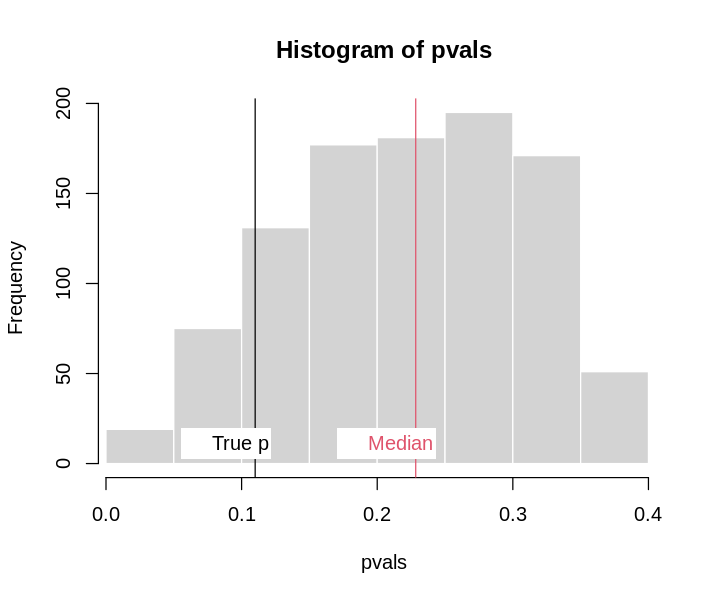

In [ ]:

options(repr.plot.width=6, repr.plot.height=5)

hist(pvals, xlim=c(0.01,0.4),
breaks=10, border=F)
abline(v=exp.p.value)
abline(v=median(pvals), col=2)
legend(.17,20,'Median', box.lty=0,
  text.col=2)
legend(0.5*exp.p.value,20,'True p',
  box.lty=0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.11    0.11    0.11    0.11    0.11    0.11 

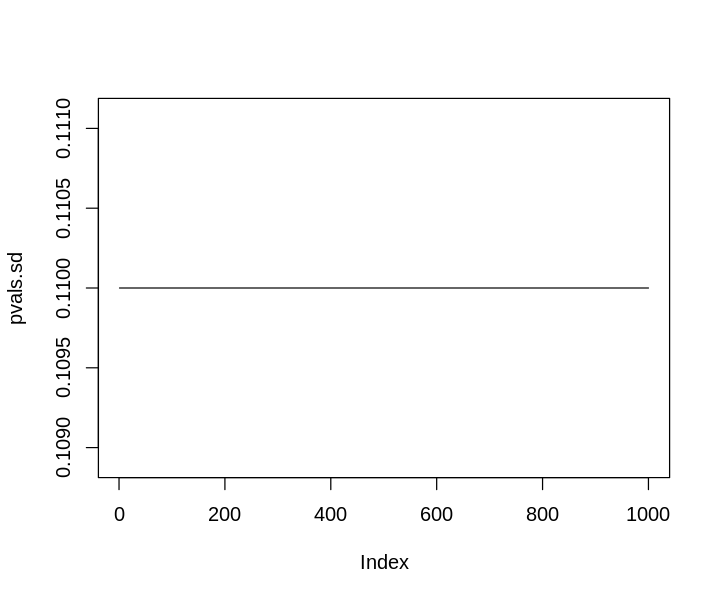

In [ ]:
plot(pvals.sd, type='l')
summary(pvals.sd)

Taleb's plot comes from the Monte Carlo simulation explained [here](https://www.youtube.com/watch?v=8qrfSh07rT0&ab_channel=NNTaleb%27sProbabilityMoocs):

The simulated data comes from a Gaussian distribution with a mean $\mu = 0.5$ and standard deviation $\sigma = 1.$ The size of the samples is $n=30.$

[1] 0.005206356

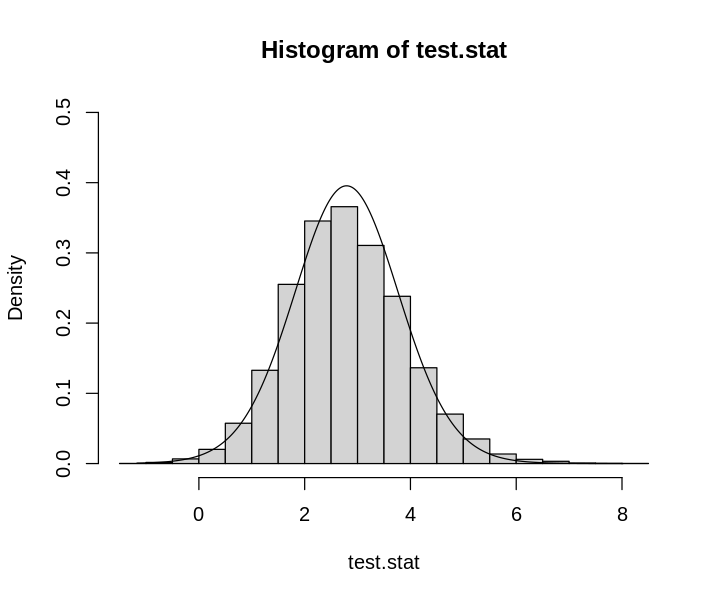

In [ ]:
n <- 30
samples <- replicate(1e4, rnorm(n,.5,1))
mu <- 0.5
test.stat <- rep(sqrt(30), ncol(samples)) * colMeans(samples)/apply(samples, 2, sd)
hist(test.stat, probability = T, ylim=c(0,0.5))

# The test statistic follows a t distribution:
x <- seq(min(test.stat),max(test.stat),0.01)
lines(x, dt(x-mean(test.stat), df=n-1))

[1] 0.005206356

[1] 0.02993342

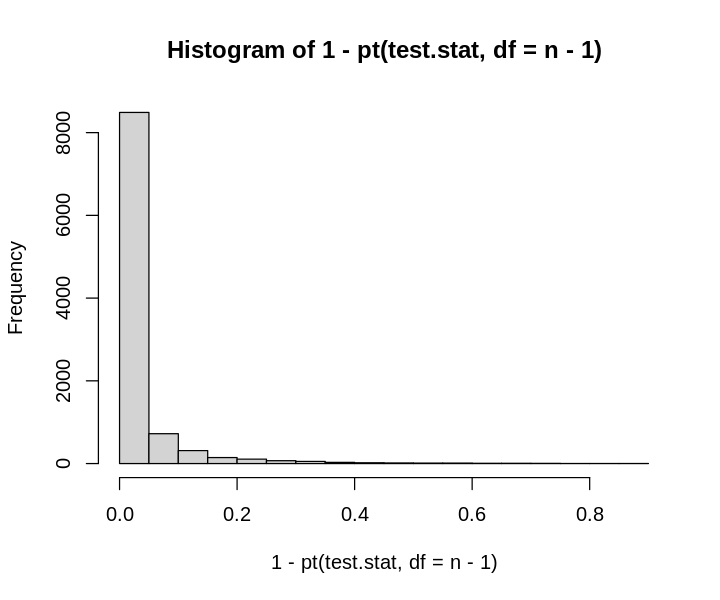

In [ ]:
# P values assuming mean of zero (survival function):
median(1 - pt(test.stat, df=n-1))
mean(1 - pt(test.stat, df=n-1))
hist(1 - pt(test.stat, df=n-1))